In [60]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

tweets = pd.read_csv("../../data/Raw Data/R_Twitter_API/Crypto_Tweets_R_raw_text.txt", sep='delimiter', header=None, names=['Raw_Text'])

/var/folders/r6/q0qh39ts70582wth4g1dhjhm0000gn/T/ipykernel_70110/2459003587.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweets = pd.read_csv("../../data/Raw Data/R_Twitter_API/Crypto_Tweets_R_raw_new.txt", sep='delimiter', header=None, names=['Raw_Text'])


In [61]:
tweets.head()

,Raw_Text
0,Murky. Indian tech workers caught up in a cybe...
1,Excited to take this fight public.
2,This frivolous SEC charge sets a bad precedent...
3,Sounds like the guy committed a hate crime aga...
4,China Arrests Crime Group Responsible for Laun...


In [62]:
tweets.shape

(592, 1)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = []
for i  in range(len(tweets.columns)):
    corpus.append(' '.join(tweets.iloc[j,i] for j in range(len(tweets.iloc[:,i]))))

# INITIALIZE COUNT VECTORIZER
vectorizer=CountVectorizer()  

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
print(type(Xs))

### EXPLORE THE OBJECT ATTRIBUTES 

# VOCABULARY DICTIONARY
print("vocabulary = ",vectorizer.vocabulary_)   

# STOP WORDS 
print("stop words =", vectorizer.stop_words)

# col_names
col_names=vectorizer.get_feature_names_out()
print("col_names=",col_names)

print("SPARSE MATRIX\n",Xs)


print("COLUMN NAMES=",col_names)
print("CORPUS WIDE WORD COUNTS:",np.sum(X,axis=0))
print("WORDS PER DOCUMENT:\n",np.sum(X,axis=1))

#CONVERT DOCUMENT TERM FREQUENCY TO ONE HOT ENCODED VECTORS
maxs=np.max(X,axis=0)
ONE_HOT_ENCODED=np.ceil(X/maxs)
print("MAX COUNT:",maxs)
print("ONE_HOT_ENCODED")
print(ONE_HOT_ENCODED)

<class 'scipy.sparse.csr.csr_matrix'>
vocabulary =  {'murky': 897, 'indian': 700, 'tech': 1301, 'workers': 1492, 'caught': 263, 'up': 1401, 'in': 694, 'cyber': 374, 'crime': 335, 'crypto': 346, 'scam': 1168, 'racket': 1077, 'being': 195, 'orchestrated': 965, 'out': 973, 'of': 944, 'myanmar': 905, 'likely': 808, 'https': 672, 'co': 294, '44pol7sdls': 31, 'excited': 501, 'to': 1336, 'take': 1286, 'this': 1328, 'fight': 532, 'public': 1044, 'frivolous': 571, 'sec': 1175, 'charge': 276, 'sets': 1193, 'bad': 174, 'precedent': 1022, 'for': 553, 'the': 1313, 'entire': 477, 'industry': 703, '9odusp7xhd': 61, 'sounds': 1233, 'like': 807, 'guy': 626, 'committed': 307, 'hate': 638, 'against': 93, 'an': 120, 'old': 951, 'man': 848, 'hawley': 641, 'wants': 1447, 'defend': 395, 'go': 604, 'figure': 534, 'otm3iysy1f': 970, 'china': 281, 'arrests': 153, 'group': 618, 'responsible': 1123, 'laundering': 789, '6b': 44, 'funds': 582, 'ug4zilc1hc': 1380, 'rt': 1144, 'heatherfernsby': 648, 'reversal': 1124,

In [ ]:
#CONVERT TO DENSE MATRIX
X=np.array(Xs.todense())
print("CORPUS=",corpus)
print("COLUMN NAMES=",col_names)
print("DOCUMENT WORD COUNTS")
print("SPARSE MATRIX\n",X)  


In [ ]:
print("COLUMN NAMES=",col_names)
print("CORPUS WIDE WORD COUNTS:",np.sum(X,axis=0))
print("WORDS PER DOCUMENT:\n",np.sum(X,axis=1))


In [ ]:
#CONVERT DOCUMENT TERM FREQUENCY TO ONE HOT ENCODED VECTORS
maxs=np.max(X,axis=0)
ONE_HOT_ENCODED=np.ceil(X/maxs)
print("MAX COUNT:",maxs)
print("ONE_HOT_ENCODED")
print(ONE_HOT_ENCODED)

In [64]:
#------------------------
# #COMPUTE PAIRWISE DISTANCES BETWEEN DOCUMENTS 
#------------------------

print("--------------------------------------------")
#LOOP OVER ROWS (DOCUMENTS)
for i in range(0,X.shape[0]):
    # for j in range(i+1,len(X)):
    for j in range(i,X.shape[0]):
        print("DOC-i=",i,"DOC-j=",j); #print(X[i,:]); print(X[j,:])
        print("     CARTESIAN:",(np.sum((X[i,:]-X[j,:])**2.0)**0.5))

        #CARTESIAN DISTANCE
        CS=np.dot(X[i,:],X[j,:])/np.linalg.norm(X[i,:])/np.linalg.norm(X[j,:])
        print("     COSINE SIMILARITY:",CS)
        print("     COSINE DISTANCE:",1.0-CS)
print("--------------------------------------------")

--------------------------------------------
DOC-i= 0 DOC-j= 0
     CARTESIAN: 0.0
     COSINE SIMILARITY: 1.0
     COSINE DISTANCE: 0.0
--------------------------------------------


### Perplexity for Uni Gram Models

In [51]:
import re
from nltk.corpus import stopwords

additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)
tweets['Processed_Text'] = tweets['Raw_Text'].str.lower().apply(lambda x: re.sub(r"(?:\@|https?\://)\S+", "", x))

tweets_clean = tweets['Processed_Text'].values

X = tweets_clean[0:500]
x_test = tweets_clean[500:592]

from nltk import word_tokenize
from nltk import sent_tokenize

tokenized_text = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(".".join(X))]
tokenized_test = [list(map(str.lower, word_tokenize(sent))) 
                  for sent in sent_tokenize(".".join(x_test))]

In [52]:
from nltk.lm import MLE

ngram = 1
train, vocab = nltk.lm.preprocessing.padded_everygram_pipeline(ngram, tokenized_text)
test,_ = nltk.lm.preprocessing.padded_everygram_pipeline(ngram, tokenized_test)

model = nltk.lm.models.KneserNeyInterpolated(ngram)
model.fit(train, vocab)

ave = 0
count = 0
for t,s in zip(test, x_test):
    perplexity = model.perplexity(t)
    ave = ave + perplexity
    count += 1
ave = ave/count
print(ave)

ZeroDivisionError: division by zero

### Sentiment Intensity Analyzer from Vader

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
tweets['rating'] = tweets['Processed_Text'].apply(analyzer.polarity_scores)

def just_compound(x):
    return x['compound']

tweets['rating'] = tweets['rating'].apply(lambda x: just_compound(x))

tweets

avg_sentiment = tweets['rating'].mean()
avg_sentiment


-0.15169222972972934

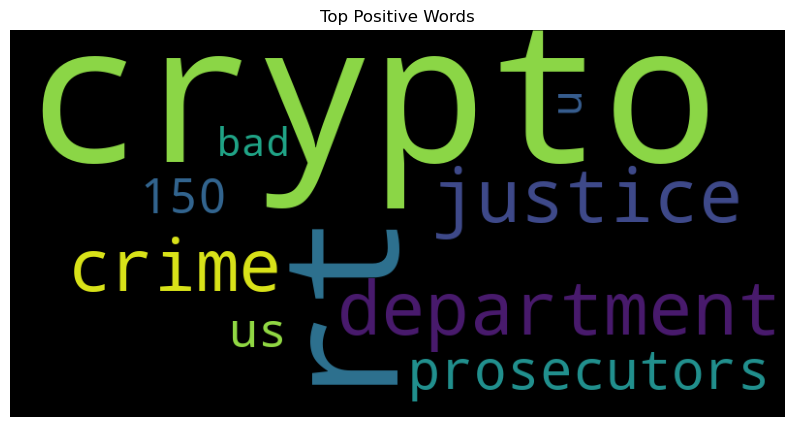

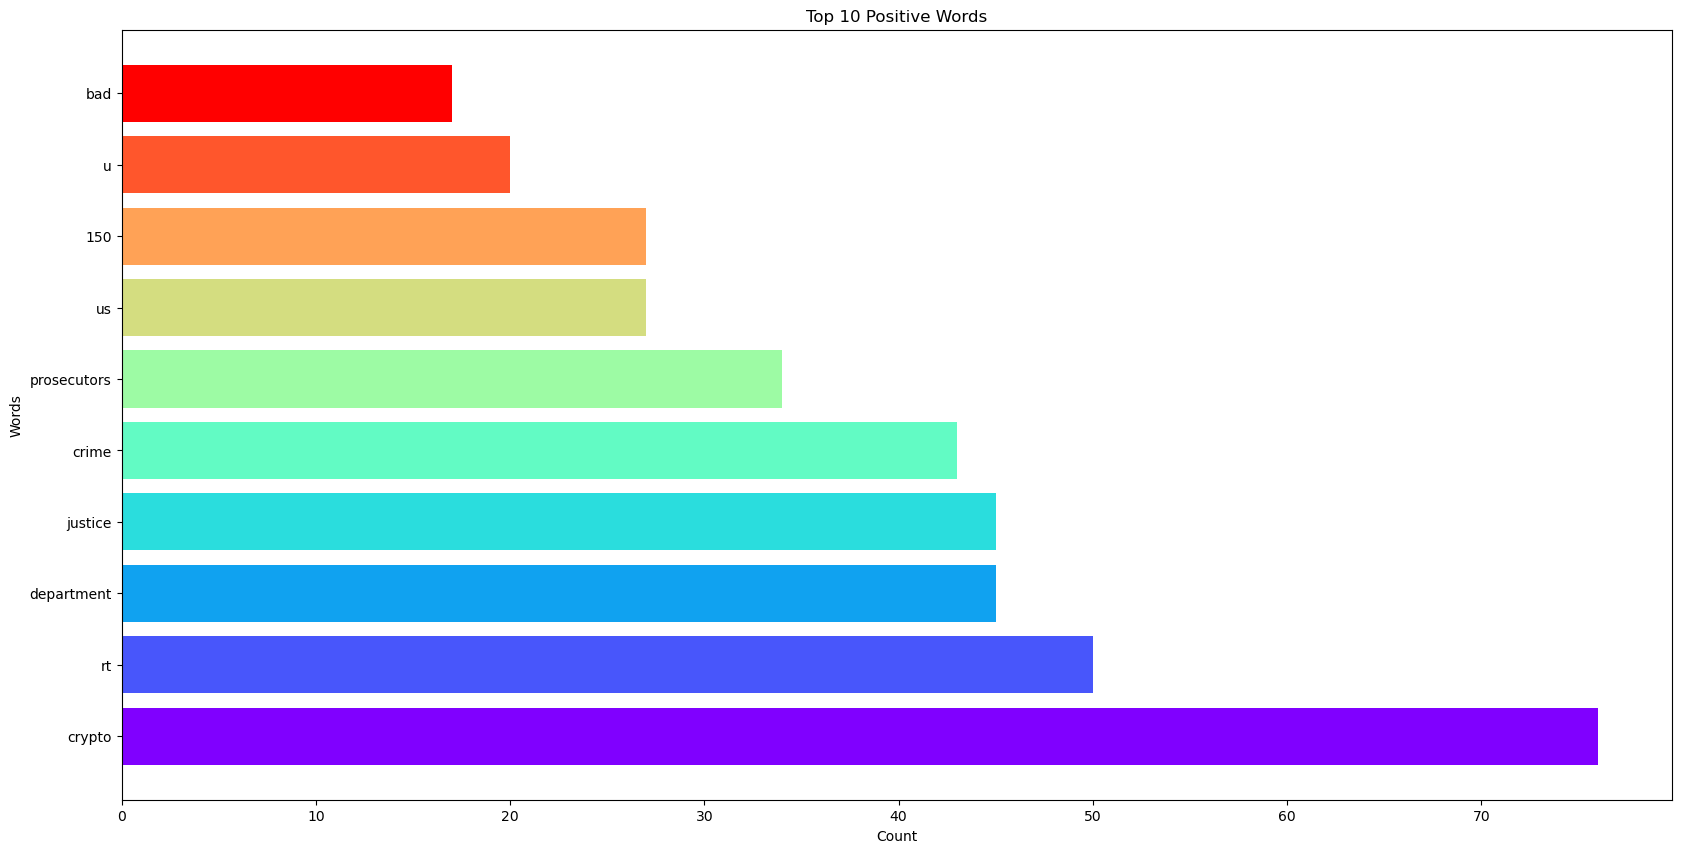

In [57]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

stopwords = stop_words

def makeWordCloud(freqs, title):
    rcParams['figure.figsize'] = 10, 20
    wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=25, width=800, height=400).generate_from_frequencies(freqs)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
def makeFreqBarChart(freqs, title):
    words = list(freqs.keys())
    counts = list(freqs.values())
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

just_pos = tweets[tweets['rating'] > 0]
just_neg = tweets[tweets['rating'] < 0]

pos_lines = list(just_pos['Processed_Text'])

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

word_freq = dict(pos_freq.most_common(10))

makeWordCloud(word_freq, "Top Positive Words")
makeFreqBarChart(word_freq, "Top 10 Positive Words")

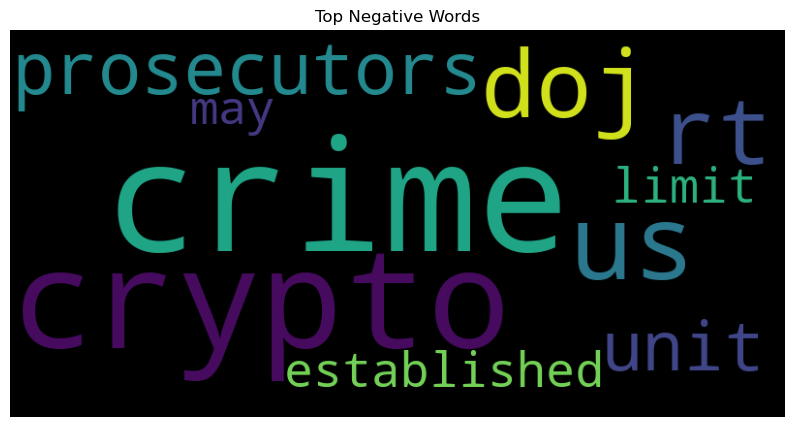

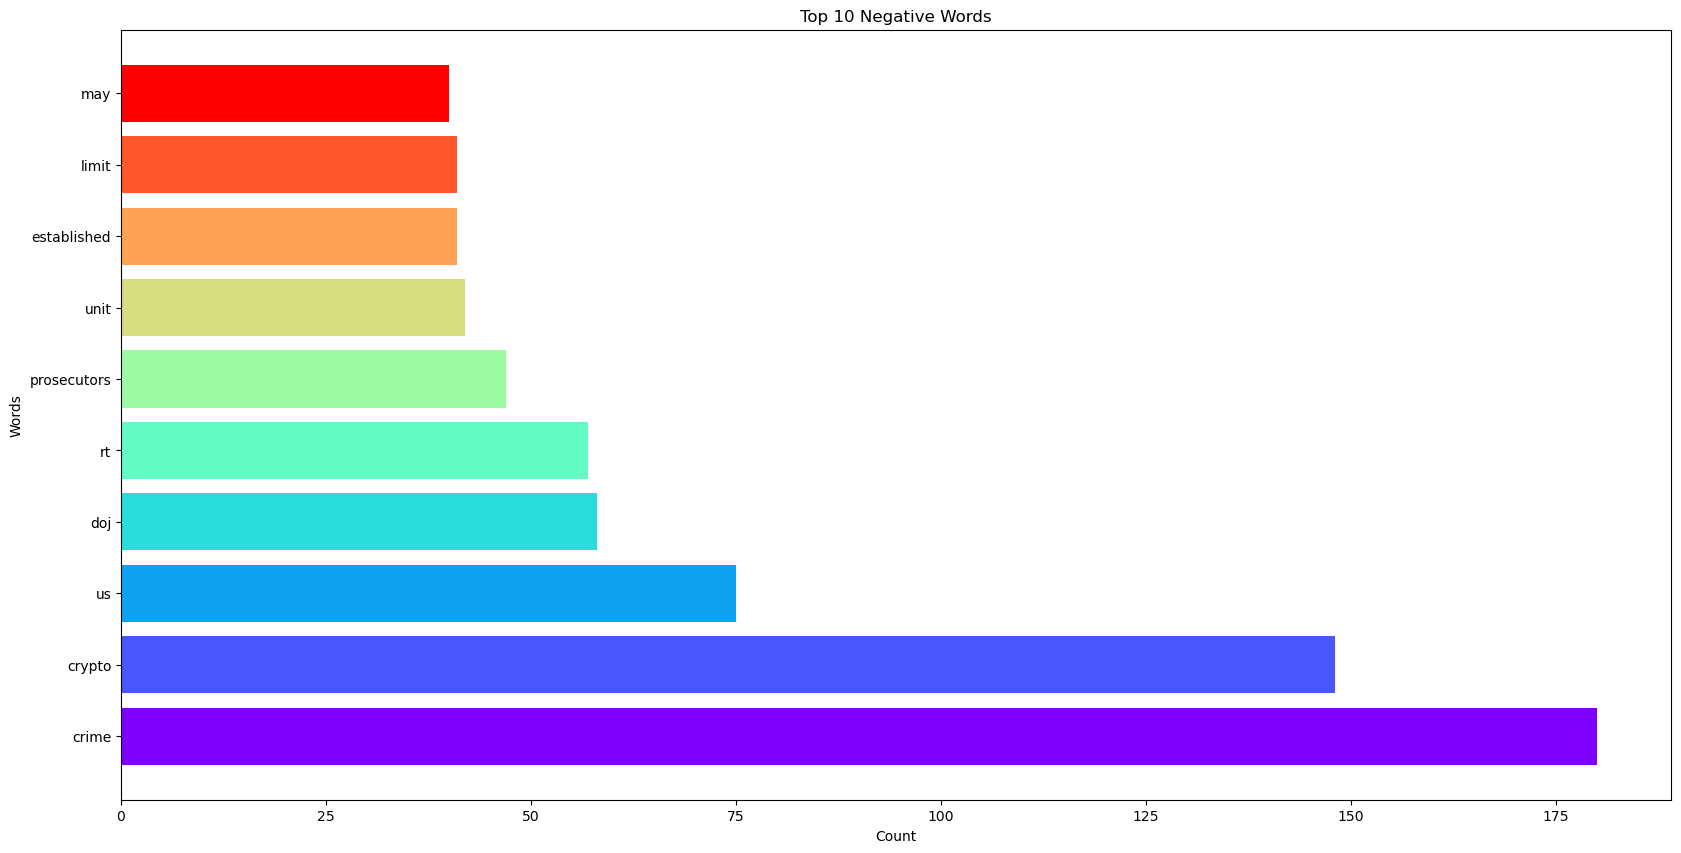

In [58]:
pos_lines = list(just_neg['Processed_Text'])

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

word_freq = dict(pos_freq.most_common(10))

makeWordCloud(word_freq, "Top Negative Words")
makeFreqBarChart(word_freq, "Top 10 Negative Words")